In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import pylab
import warnings
warnings.filterwarnings('ignore')

In /home/dongjun819/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/dongjun819/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/dongjun819/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/dongjun819/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/dongjun819/.local/lib/python3.6/site-packages/m

In [2]:
cas_data= pd.read_csv('cas.csv')
dff_road_safety_data=pd.read_csv('dftRoadSafety_Accidents_2016.csv')
model_2016_data=pd.read_csv('MakeModel2016.csv')
vehicle_data=pd.read_csv('Veh.csv')

In [3]:
cas_data.columns

Index(['Accident_Index', 'Vehicle_Reference', 'Casualty_Reference',
       'Casualty_Class', 'Sex_of_Casualty', 'Age_of_Casualty',
       'Age_Band_of_Casualty', 'Casualty_Severity', 'Pedestrian_Location',
       'Pedestrian_Movement', 'Car_Passenger', 'Bus_or_Coach_Passenger',
       'Pedestrian_Road_Maintenance_Worker', 'Casualty_Type',
       'Casualty_Home_Area_Type', 'Casualty_IMD_Decile'],
      dtype='object')

In [4]:
cas_data.head()

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
0,2016010000005,2,1,1,1,23,5,3,0,0,0,0,0,2,1,4
1,2016010000006,1,1,1,2,36,7,3,0,0,0,0,0,9,1,10
2,2016010000008,1,1,1,1,24,5,3,0,0,0,0,0,9,1,8
3,2016010000016,1,1,2,2,59,9,3,0,0,0,3,0,11,1,4
4,2016010000018,2,1,1,1,28,6,3,0,0,0,0,0,1,1,6


Text(0.5, 1.0, 'Casualty based on age')

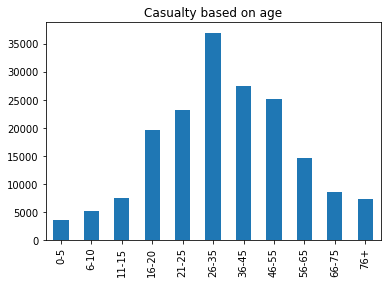

In [5]:
age_range={1:'0-5', 2:'6-10',3:'11-15',4:'16-20',5:'21-25',6:'26-35',7:'36-45',8:'46-55',9:'56-65',10:'66-75',11:'76+'}
cas_data['Age_Band_of_Casualty'].value_counts().sort_index()[1:12].rename(index=age_range).plot(kind='bar')
plt.title('Casualty based on age')

Text(0.5, 1.0, 'Casualty based on Sex')

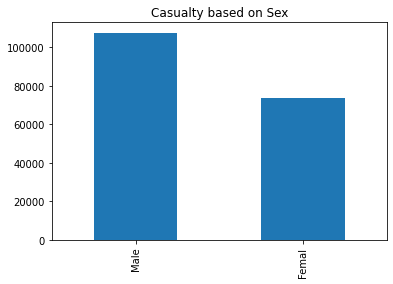

In [6]:
sex_type={1:'Male', 2:'Femal'}
cas_data['Sex_of_Casualty'].value_counts()[:2].rename(index=sex_type).plot(kind='bar')
plt.title('Casualty based on Sex')

Text(0.5, 1.0, 'Casualty based on Home Area')

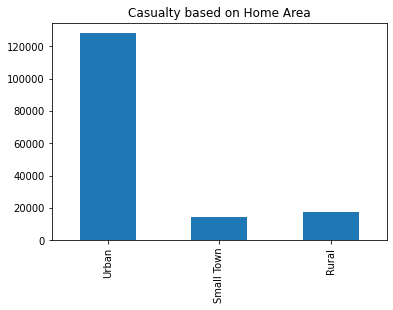

In [7]:
home_area={1:'Urban', 2:'Small Town', 3:'Rural'}
cas_data['Casualty_Home_Area_Type'].value_counts().sort_index()[1:4].rename(index=home_area).plot(kind='bar')
plt.title('Casualty based on Home Area')

In [8]:
dff_road_safety_data.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,2016010000005,519310.0,188730.0,-0.279323,51.584754,1,3,2,1,01/11/2016,...,0,0,5,1,1,0,0,1,1,E01000543
1,2016010000006,551920.0,174560.0,0.184928,51.449595,1,3,1,1,01/11/2016,...,0,0,4,1,1,0,0,1,1,E01000375
2,2016010000008,505930.0,183850.0,-0.473837,51.543563,1,3,1,1,01/11/2016,...,0,0,4,1,1,0,0,1,1,E01033725
3,2016010000016,527770.0,168930.0,-0.164442,51.404958,1,3,1,1,01/11/2016,...,0,0,1,1,1,0,0,1,1,E01003379
4,2016010000018,510740.0,177230.0,-0.406580,51.483139,1,3,2,1,01/11/2016,...,0,0,1,1,1,0,0,1,1,E01002583


In [9]:
dff_road_safety_data.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location'],
      dtype='object')

In [10]:
dff_road_safety_data['Time'].isnull().sum()

2

In [11]:
dff_road_safety_data.fillna(method='ffill', inplace=True)

In [12]:
dff_road_safety_data['Time'].isnull().sum()

0

In [13]:
def hour_from_time(time):
    hhmm = datetime.strptime(time, '%H:%M')
    return int(datetime.strftime(hhmm, '%H'))

In [14]:
dff_road_safety_data['Hour']=dff_road_safety_data['Time'].apply(hour_from_time)

In [15]:
times = [0,4,8,12,16,20,24]
time_range = ['Late Night', 'Early Morning','Morning','Noon','Evening','Night']
dff_road_safety_data['Hour'] = pd.cut(dff_road_safety_data['Hour'], bins=times, labels=time_range, include_lowest=True)
dff_road_safety_data['Hour']

0            Late Night
1            Late Night
2            Late Night
3               Morning
4         Early Morning
              ...      
136616    Early Morning
136617             Noon
136618    Early Morning
136619          Evening
136620          Morning
Name: Hour, Length: 136621, dtype: category
Categories (6, object): ['Late Night' < 'Early Morning' < 'Morning' < 'Noon' < 'Evening' < 'Night']

Text(0.5, 1.0, 'Casualty based on Time')

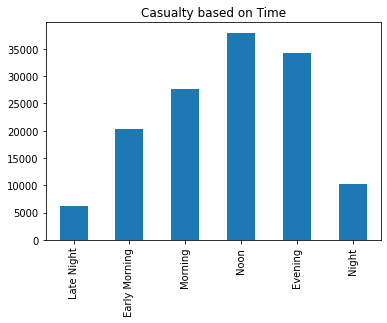

In [16]:
dff_road_safety_data['Hour'].value_counts().sort_index()[:6].plot(kind='bar')
plt.title('Casualty based on Time')

Text(0.5, 1.0, 'Casualty based on Week')

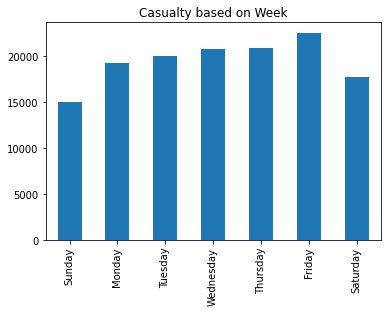

In [17]:
week_range={1:'Sunday', 2:'Monday',3:'Tuesday',4:'Wednesday',5:'Thursday',6:'Friday',7:'Saturday'}
dff_road_safety_data['Day_of_Week'].value_counts().sort_index()[:7].rename(index=week_range).plot(kind='bar')
plt.title('Casualty based on Week')

In [18]:
set(dff_road_safety_data['Road_Surface_Conditions'])

{-1, 1, 2, 3, 4, 5}

Text(0.5, 1.0, 'Casualty based on Road Surface Condition')

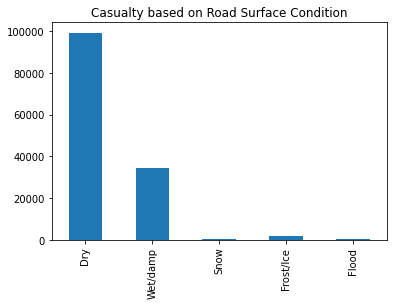

In [19]:
road_condition={1:'Dry', 2:'Wet/damp',3:'Snow',4:'Frost/Ice',5:'Flood',6:'Oil',7:'Mud'}
dff_road_safety_data['Road_Surface_Conditions'].value_counts().sort_index()[1:7].rename(index=road_condition).plot(kind='bar')
plt.title('Casualty based on Road Surface Condition')

<AxesSubplot:>

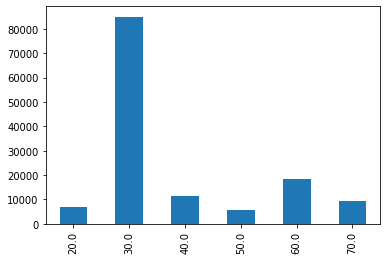

In [20]:
dff_road_safety_data['Speed_limit'].value_counts().sort_index().plot(kind='bar')

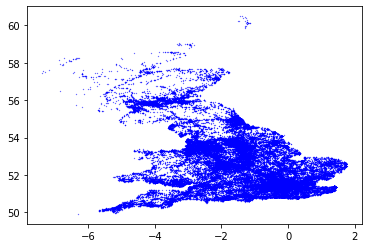

In [21]:
plt.plot(dff_road_safety_data['Longitude'], dff_road_safety_data['Latitude'],'b.', ms=0.5)

In [22]:
model_2016_data.head()

,Accident_Index,accyr,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,make,model
0,2016010000005,2016,1,8,0,6,0,0,0,0,...,1,1,8,-1,-1,-1,3,1,NaN,NaN
1,2016010000005,2016,2,2,0,18,0,0,0,0,...,6,1,5,124,1,4,4,1,YAMAHA,HW 125 XENTER
2,2016010000006,2016,1,9,0,18,0,2,2,10,...,6,2,7,1461,2,1,10,1,MERCEDES,A180 BLUEEFFICIENCY SPORT CDI
3,2016010000008,2016,1,9,0,18,0,4,5,0,...,6,1,5,1390,1,5,8,1,VOLKSWAGEN,SCIROCCO TSI
4,2016010000016,2016,1,11,0,18,0,1,0,0,...,1,1,8,6692,2,7,9,1,OTHER BRITISH,Missing


In [23]:
model_2016_data.columns

Index(['Accident_Index', 'accyr', 'Vehicle_Reference', 'Vehicle_Type',
       'Towing_and_Articulation', 'Vehicle_Manoeuvre',
       'Vehicle_Location-Restricted_Lane', 'Junction_Location',
       'Skidding_and_Overturning', 'Hit_Object_in_Carriageway',
       'Vehicle_Leaving_Carriageway', 'Hit_Object_off_Carriageway',
       '1st_Point_of_Impact', 'Was_Vehicle_Left_Hand_Drive',
       'Journey_Purpose_of_Driver', 'Sex_of_Driver', 'Age_Band_of_Driver',
       'Engine_Capacity_(CC)', 'Propulsion_Code', 'Age_of_Vehicle',
       'Driver_IMD_Decile', 'Driver_Home_Area_Type', 'make', 'model'],
      dtype='object')

In [24]:
car_model = model_2016_data[['make','model']]
car_model.dropna()

,make,model
1,YAMAHA,HW 125 XENTER
2,MERCEDES,A180 BLUEEFFICIENCY SPORT CDI
3,VOLKSWAGEN,SCIROCCO TSI
4,OTHER BRITISH,Missing
5,BMW,116i
...,...,...
252494,RENAULT,MEGANE DYNAMIQUE 16V
252495,MINI,MINI COOPER
252496,VAUXHALL,ASTRA ENERGY CDTI
252498,VAUXHALL,VECTRA SXI 16V


<AxesSubplot:>

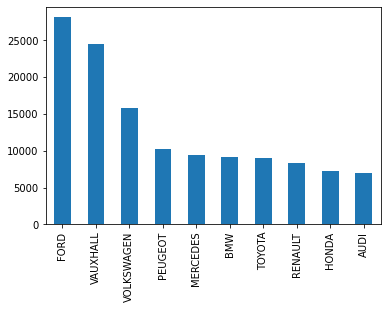

In [25]:
car_model['make'].value_counts()[:10].plot(kind='bar')